In [3]:
from google.colab import files
uploaded = files.upload()


Saving customer_feedback_satisfaction.csv to customer_feedback_satisfaction.csv


### Read file

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('customer_feedback_satisfaction.csv')
df.head()


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


### Dataset shape & info

In [3]:
df.shape

(38444, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


## Data analys

In [6]:
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")

CustomerID: 38444
Age: 52
Gender: 2
Country: 5
Income: 31442
ProductQuality: 10
ServiceQuality: 10
PurchaseFrequency: 20
FeedbackScore: 3
LoyaltyLevel: 3
SatisfactionScore: 5959


In [15]:
 print('countries :')
 print(df['Country'].unique())

print('FeedbackScores :')
print(df['FeedbackScore'].unique())

print('LoyaltyLevels :')
print(df['LoyaltyLevel'].unique())

countries :
['UK' 'USA' 'France' 'Germany' 'Canada']
FeedbackScores :
['Low' 'Medium' 'High']
LoyaltyLevels :
['Bronze' 'Gold' 'Silver']


### Distribution Count based on Country:



Distribution Count based on Country:
Country
USA        7762
France     7707
Canada     7693
Germany    7654
UK         7628
Name: count, dtype: int64


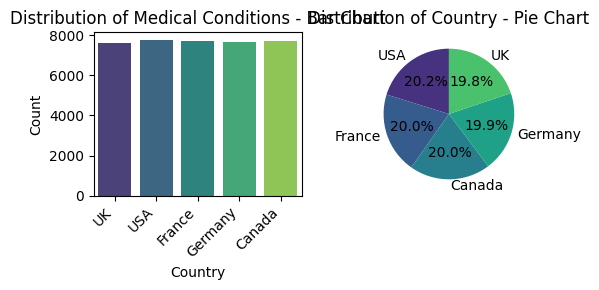

In [17]:
Country = df['Country'].value_counts()

print("\nDistribution Count based on Country:")

print(Country)
plt.figure(figsize=(6, 3))



plt.subplot(1, 2, 1)

sns.countplot(x='Country', data=df, hue='Country', palette='viridis', legend=False)

plt.title('Distribution of Medical Conditions - Bar Chart')

plt.xlabel('Country')

plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')



plt.subplot(1, 2, 2)

plt.pie(Country, labels=Country.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Distribution of Country - Pie Chart')



plt.tight_layout()

plt.show()

### Distribution Count based on FeedbackScore:



Distribution Count based on FeedbackScore:
FeedbackScore
High      12918
Low       12784
Medium    12742
Name: count, dtype: int64


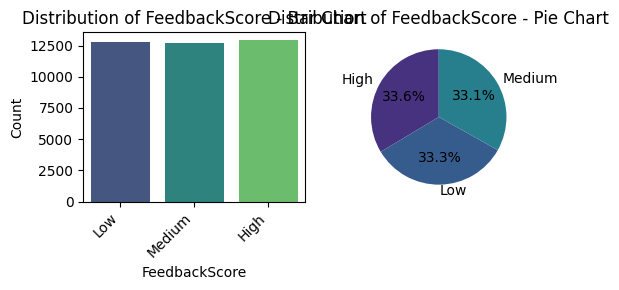

In [16]:
FeedbackScore = df['FeedbackScore'].value_counts()

print("\nDistribution Count based on FeedbackScore:")
print(FeedbackScore)

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='FeedbackScore', data=df, hue='FeedbackScore', palette='viridis', legend=False)
plt.title('Distribution of FeedbackScore - Bar Chart')
plt.xlabel('FeedbackScore')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(FeedbackScore, labels=FeedbackScore.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of FeedbackScore - Pie Chart')

plt.tight_layout()
plt.show()


### Distribution Count based on LoyaltyLevel:



Distribution Count based on LoyaltyLevel:
LoyaltyLevel
Gold      12912
Bronze    12804
Silver    12728
Name: count, dtype: int64


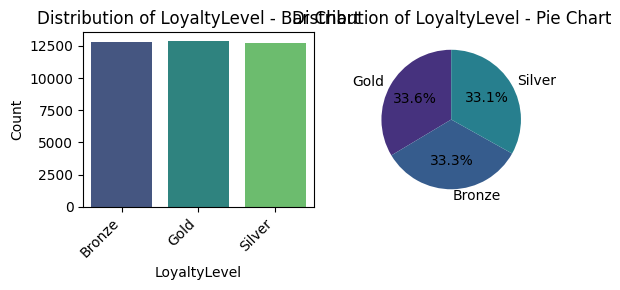

In [15]:
LoyaltyLevel = df['LoyaltyLevel'].value_counts()

print("\nDistribution Count based on LoyaltyLevel:")
print(LoyaltyLevel)

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='LoyaltyLevel', data=df, hue='LoyaltyLevel', palette='viridis', legend=False)
plt.title('Distribution of LoyaltyLevel - Bar Chart')
plt.xlabel('LoyaltyLevel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(LoyaltyLevel, labels=LoyaltyLevel.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of LoyaltyLevel - Pie Chart')

plt.tight_layout()
plt.show()


### Distribution Count based on Gender:



Distribution Count based on Gender:
Gender
Female    19294
Male      19150
Name: count, dtype: int64


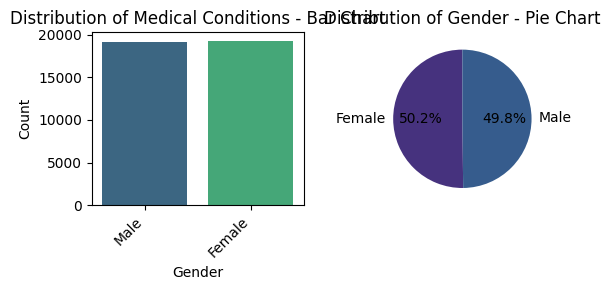

In [14]:
Gender = df['Gender'].value_counts()

print("\nDistribution Count based on Gender:")

print(Gender)
plt.figure(figsize=(6, 3))



plt.subplot(1, 2, 1)

sns.countplot(x='Gender', data=df, hue='Gender', palette='viridis', legend=False)

plt.title('Distribution of Medical Conditions - Bar Chart')

plt.xlabel('Gender')

plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')



plt.subplot(1, 2, 2)

plt.pie(Gender, labels=Gender.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Distribution of Gender - Pie Chart')



plt.tight_layout()

plt.show()

### Distribution of Age in 10-Year Intervals

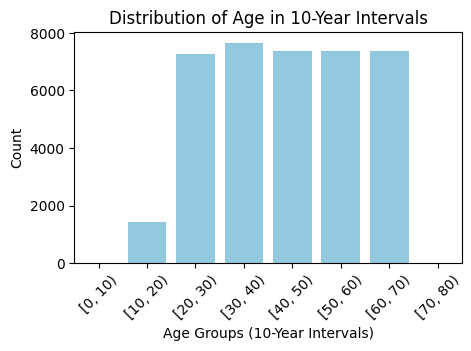

In [13]:
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 90, 10), right=False)

plt.figure(figsize=(5, 3))
sns.countplot(x='AgeGroup', data=df, color='skyblue')
plt.title('Distribution of Age in 10-Year Intervals')
plt.xlabel('Age Groups (10-Year Intervals)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# testing **Machine Learning** algorithms to predict SatisfactionScore

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Label Encoding for categorical features
le_country = LabelEncoder()
le_gender = LabelEncoder()
le_loyalty = LabelEncoder()
le_feedback = LabelEncoder()

# Apply Label Encoding
df['Country'] = le_country.fit_transform(df['Country'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['LoyaltyLevel'] = le_loyalty.fit_transform(df['LoyaltyLevel'])
df['FeedbackScore'] = le_feedback.fit_transform(df['FeedbackScore'])


# Defining the features (X) and the target (y)
X = df[['Country', 'Gender', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel']]
y = df['SatisfactionScore']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store R2 scores
r2_scores = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Calculate R2 score
    r2_scores[model_name] = r2_score(y_test, y_pred)
    print(f"{model_name} R2 Score: {r2_scores[model_name]:.4f}")


# Finding the best model based on R2 score
best_model = max(r2_scores, key=r2_scores.get)
print(f"\nBest Model: {best_model} with R2 Score: {r2_scores[best_model]:.4f}")


Linear Regression R2 Score: 0.6698
Decision Tree R2 Score: 0.4660
Random Forest R2 Score: 0.7164
Gradient Boosting R2 Score: 0.7536

Best Model: Gradient Boosting with R2 Score: 0.7536


###